## Content

- **Regression using DT**
    - Intuition
    - Scratch Implementation
    - Sklearn implementation

- **Code walkthrough for splitting numerical feature**

## **Regression using decision tree**

For Classifiaction task,  
* We had entropy and Gini Impurity to choose the feature for split. 
* At leaf node, we had datapoints with $y_i's$ and
    - we used class label of **majority data points** to predict the class label for query data point.

#### Question: Can we use Entropy or Gini Impurity for regression?
NO! Since entropy and GI are functions of probability of class labels.
- For regression, we don't have any class labels
- We have continous values.


Also, we have continous y label in leaf nodes as well. How do we calculate predicted label? 

**What do we do in the Regression?**
*  We take the mean or median of all values in the leaf node and give that value as predicted value ($y_{pred}$).




<img src='https://drive.google.com/uc?id=18nvTgpEKS4Rhcn4em4hPNgyH1eRLF14Q'>

#### Question: What is the alternative for Entropy? (Hint: Recall Linear Regression)
* here, as we saw in linear regression already,we can use **Mean Squared Error or Median Absolute error**

Let us assume a data D at root node 
- along with $y_i$ (continuous) 
- It is split into D1 and D2 

Now we calculate 
- the MSE of these points in parent node and 
- the weighted MSE for the child nodes


Now, the difference between the MSE of parent node and weighted MSE of child nodes can be used as the criteria.
 * ΔMSE = (MSE of parent node) $-$ (weighted MSE of child nodes) 

* MSE is lowest when all $y_i$'s are same and high when they are diverse


<img src='https://drive.google.com/uc?id=11QnvrLTzCUN0pDEXHb5zXSOTIL_UHV-X'>




<img src='https://drive.google.com/uc?id=1jGzM-H3p-wgW3_bVga-WMNb_QsF0x5mj'>

#### **How is MSE calculated?**
 
Let us assume we have a datapoints with target value $y$ 
* We consider the mean or medain of these points as predicted value i.e $ŷ_i$
* Now we calculate the MSE or MAE for these points, this will be the MSE of parent node.
* After the data is split 
 * We now consider the mean of all values ($y_i'$) in child node as predicted value $ŷ_i'$
 * we now calculate the MSE or MAE for these in each child node and then calculate the weighted  MSE of the child nodes.
* Then we find the difference and use this as the critearia to be compared among the features to decide the split.


<img src='https://drive.google.com/uc?id=1J8ifUk-ir3xCSsTRkr855bU0RB_ea-gF'>

### Example



Suppose we have 6 datapoints with two features ($f_1, f_2$)
- $f_1$ has categories $C_1, C_2, C_3, C_4$
- $f_2$ has categories $D_1, D_2, D_3$
- $y_i$'s are 1,2,3,4,5,6 resp.

#### Question: What will be the $ŷ$?
It'll be mean on the $y_i$'s i.e. 3.5

Suppose we are splitting by $f_1$
- There will be 4 child nodes as there are 4 categories

For category $C_1$
- We get 3 datapoints in child node
- $ŷ$ will be mean of 1,2,3 i.e. 2

For $C_2$
- We only got 1 datapoints
- MSE for this node will be zero as actual y and predicted y will be same

Similarly, we get datapoints in $C_3$ and $C_4$

- We calculate MSE for child nodes and then calculate weighted MSE for child nodes
- Then, we calculate ΔMSE i.e. MSE parent - weighted MSE of child.


#### What does ΔMSE signify?
It signifies the reduction in MSE from parent to child.

#### What is objective of regression?
We want to reduce the MSE as much as possible

So, We will pick the feature with highest ΔMSE  for split




<img src='https://drive.google.com/uc?id=1TTqz-kAYonTuDkR81BbBW_s4ZT8JxPwF'>

### Code walkthrough - scratch implementation for threshold

#### Loading data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [ ]:
!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 26.8MB/s]


In [ ]:
regression_data = pd.read_csv('regData.csv')

In [ ]:
regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [ ]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


Ther are total of 600 datapoints

In [ ]:
X = regression_data['X']
y = regression_data['Y']

#### Plotting data

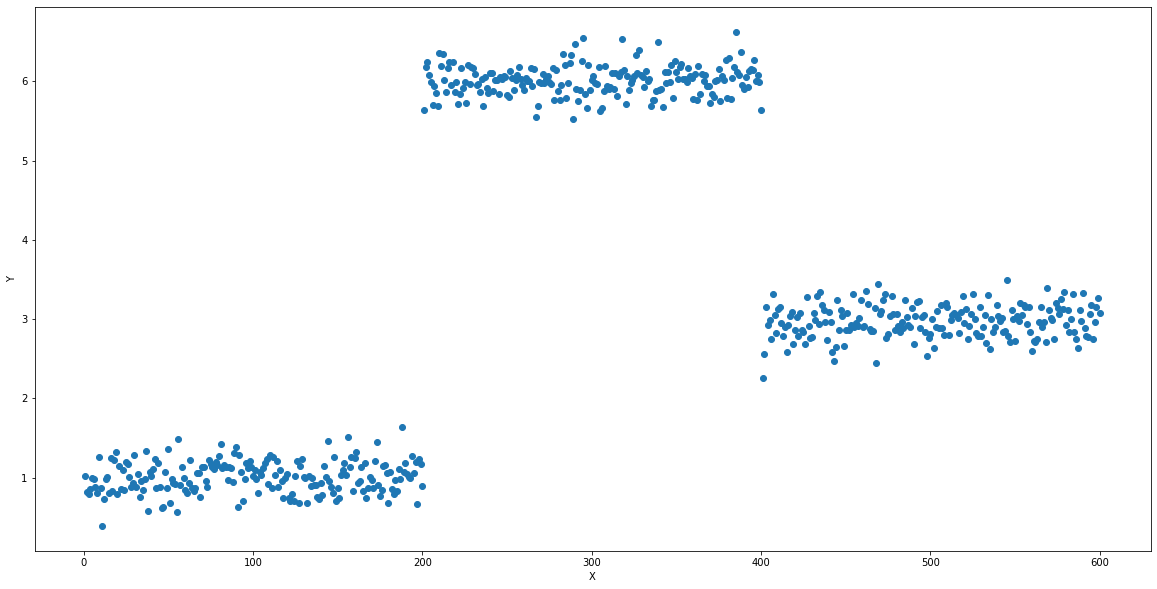

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)  

#### Sorting feature to calculate threshold

In [ ]:
thresholds = X_train.sort_values().unique()

In [ ]:
thresholds

array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  14,  15,  17,
        19,  20,  21,  22,  23,  24,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  50,  51,  52,  53,  54,  55,  56,  57,  59,  60,  61,  63,
        65,  66,  67,  71,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  84,  85,  86,  87,  88,  89,  90,  92,  93,  94,  95,  96,
        98,  99, 100, 101, 102, 103, 105, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 119, 121, 123, 125, 126, 127, 129, 130,
       132, 133, 134, 135, 136, 137, 138, 141, 147, 148, 149, 150, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       168, 169, 170, 171, 172, 173, 174, 176, 178, 180, 182, 183, 185,
       188, 189, 190, 194, 195, 198, 199, 200, 201, 202, 203, 205, 208,
       209, 210, 212, 213, 214, 216, 217, 219, 220, 221, 223, 225, 226,
       227, 228, 230, 231, 233, 235, 237, 238, 240, 241, 242, 24

#### Calculating MSE

In [ ]:
def calculate_MSE(y):
    if(y.shape[0] == 0):
        return 0

    y_pred = np.mean(y)

    n = y.shape[0]

    mse = np.sum((y - np.mean(y))**2)
    mse /= n

    return mse

#### Calculating delta MSE

In [ ]:
def calulate_deltaMSE(y,mask):
    left_node_count = sum(mask)
    total = mask.shape[0]
    right_node_count = total - left_node_count

    parent_MSE = calculate_MSE(y)

    child_MSE = left_node_count/total*calculate_MSE(y[mask]) + right_node_count/total*calculate_MSE(y[~mask])

    deltaMSE = parent_MSE - child_MSE

    return deltaMSE

    

#### Calculating best threshold for split

In [ ]:
delta_mse_train = []

for thr in thresholds:
    mask = X_train <= thr

    delta_MSE = calulate_deltaMSE(y_train, mask)

    delta_mse_train.append(delta_MSE)




In [ ]:
delta_mse_train = np.array(delta_mse_train)

print(f'Best reduction in MSE is {delta_mse_train.max()} is for threshold: {thresholds[delta_mse_train.argmax()]}')

Best reduction in MSE is 2.539507086209006 is for threshold: 200


#### Note 
sklearn implementation creates thresholds by taking average of two values.

Let's see an example:

- Say, we have feature $X_1$ as $[1,2,3,4,5]$.

- So, thresholds here will be $[1.5, 2.5, 3.5, 4.5]$

- i.e. First threshold will be  $\frac{1 + 2}{2} = 1.5$

- Similarly, second threshold will be $\frac{2 + 3}{2} = 2.5$



### Code walkthrough - sklearn DT regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
y_train = y_train.values

In [ ]:
kfold = KFold(n_splits=10)


In [ ]:
depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

K-Fold for depth:1 -ve MSE Mean: Train: -157.26203654446752 Validation: -162.90925592378582
***************
K-Fold for depth:2 -ve MSE Mean: Train: -4.048119079766786 Validation: -13.39989251528687
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3.9038139450277405 Validation: -13.834955053322545
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3.7902751186766683 Validation: -13.84652404788459
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3.783735335389713 Validation: -13.891536196689499
***************
K-Fold for depth:7 -ve MSE Mean: Train: -3.781426977910967 Validation: -13.896999974822002
***************
K-Fold for depth:9 -ve MSE Mean: Train: -3.781426977910967 Validation: -13.896999974822002
***************
K-Fold for depth:11 -ve MSE Mean: Train: -3.781426977910967 Validation: -13.896999974822002
***************


Notice, The regressor is overfitting
- This may be due to the fact that we have low number of datapoints for training.
- we can also try playing with hyperparam tuning



#### Visualizing Decision Tree

In [ ]:
features = list(regression_data.columns[0])

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=20, random_state=7)

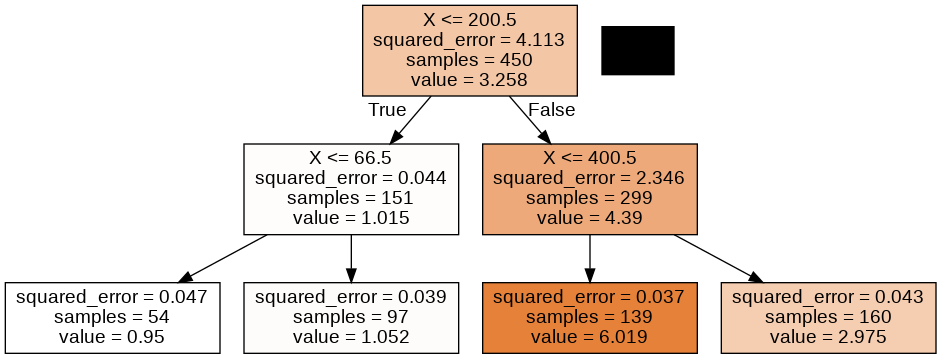

In [ ]:
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


#### Visualizing Regression Line

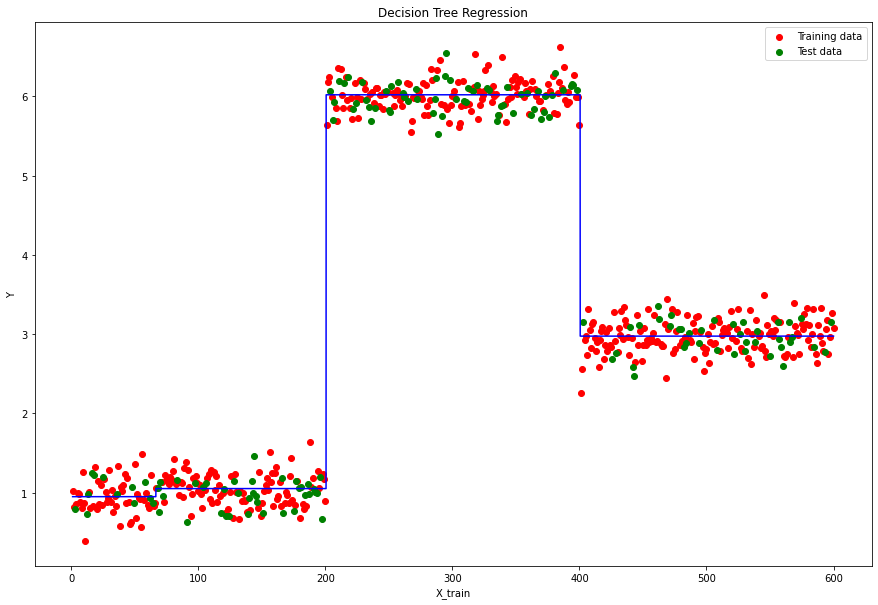

In [ ]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter (X_test, y_test, color = 'green', label = 'Test data')
plt.plot(X_grid, tree_reg.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train') 
plt.ylabel('Y')
plt.legend()
plt.show()

## Code walkthrough of Splitting numerical features



Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

Preprocessed Data

In [ ]:
!gdown 12G_J8gBel8MpspdXJruZuuMvyrm9upNb
!gdown 1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A


!gdown 1p03Ltdto8XoOdu14YlcQjzE-360SyI89
!gdown 1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx

!gdown 1ZoA7Vu1V48nPafCNJ5qhG8yVvyFfC6OA


Downloading...
From: https://drive.google.com/uc?id=12G_J8gBel8MpspdXJruZuuMvyrm9upNb
To: /content/X_test.csv
100% 51.7k/51.7k [00:00<00:00, 88.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A
To: /content/X_train.csv
100% 154k/154k [00:00<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p03Ltdto8XoOdu14YlcQjzE-360SyI89
To: /content/y_test.csv
100% 743/743 [00:00<00:00, 1.99MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx
To: /content/y_train.csv
100% 2.21k/2.21k [00:00<00:00, 4.85MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZoA7Vu1V48nPafCNJ5qhG8yVvyFfC6OA
To: /content/target.csv
100% 2.95k/2.95k [00:00<00:00, 8.18MB/s]


In [ ]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

target  = pd.read_csv('target.csv')
target = target.iloc[:,0]

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({'Target': 1})


Let's split the Age feature and find which threshold is best to split age along with its information gain

In [ ]:
age = X_sm.Age

#### Sorting the age 

In [ ]:
thresholds = age.sort_values().unique()
thresholds

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
thresholds.shape

(43,)

#### Calculating information gain for each threshold

In [ ]:
def gini_impurity(y):
    
  if isinstance(y, pd.Series):
    p = y.value_counts()/y.shape[0]
    gini = 1-np.sum(p**2)
    return gini

  else:
    raise('Object must be a Pandas Series.')

In [ ]:
def information_gain(y, mask):
    left_node_count = sum(mask)
    total = mask.shape[0]
    right_node_count = total - left_node_count


    parent_gini = gini_impurity(y)

    child_gini = left_node_count/total*gini_impurity(y[mask]) + right_node_count/total*gini_impurity(y[~mask])

    ig = parent_gini - child_gini
    return ig

In [ ]:
ig_list = []

for thr in thresholds:
    mask =   age <= thr 
    ig = information_gain(target, mask)
    ig_list.append(ig)


In [ ]:
ig_list = np.array(ig_list)

ig_list.shape

(43,)

#### Finding threshold with maximum IG

In [ ]:
print(f'Best threshold for Age with maximum IG is {thresholds[ig_list.argmax()]} with IG: {ig_list.max()}')

Best threshold for Age with maximum IG is 46 with IG: 0.0029346385275854647
